# Import Library

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics, datasets

# Import Dataset Kiva Loans


In [18]:
loans = pd.read_csv('..\Dataset\kiva_loans.csv')
mpi = pd.read_csv('..\Dataset\kiva_mpi_region_locations.csv')

In [103]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,date_month_year
posted_time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 06:12:39+00:00,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,2014-01
2014-01-01 06:51:08+00:00,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,2014-01
2014-01-01 09:58:07+00:00,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,2014-01
2014-01-01 08:03:11+00:00,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,2014-01
2014-01-01 11:53:19+00:00,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,2014-01


In [6]:
mpi.head(2)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538


### 1. Question

1. 50 country with largest number of loans
2. 10 sector popular loans sector
3. Number of loans by activity
4. Regions with most number of loans
5. Most used currency
6. Make a Linear Regression Model Loan Amount & Funded Amount VS Terms in Month
7. Make a Linear Regression Model Loan Amount VS Funded Amount
8. Top 10 uses of loans
9. Popular Sector in terms of Loan Amount

### 2. Data Wrangle

In [77]:
# DATA LOANS2 penggunaannya untuk membuat model machine learning
## Menghilangkan data kosong / null di dataset Kiva loans 
loans1 = loans.dropna()
## Menghilangkan data kosong dan drop kolom yang tidak digunakan pada dataset MPI 
mpi1 = mpi.dropna()\
          .drop(columns=['LocationName','ISO','country','world_region','geo','lat','lon'])
## Menambahkan kolom MPI ke dataset loans1 dengan fungsi merge
loans2 = pd.merge(loans1, mpi1, left_on='region', right_on='region', how='left')\
           .dropna()
loans2.head(4)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,MPI
17,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,2014-01-02 14:25:08+00:00,2013-12-17 08:00:00+00:00,2014-01-08 22:07:48+00:00,14.0,16,#Parent,female,monthly,2014-01-02,0.031
19,653432,550.0,550.0,Personal Expenses,Personal Use,to buy a cradle and household items for his yo...,PE,Peru,Ica,PEN,...,2014-01-02 23:36:30+00:00,2013-12-20 08:00:00+00:00,2014-01-22 15:55:47+00:00,14.0,20,"#Parent, user_favorite",male,monthly,2014-01-02,0.009
29,653410,1075.0,1075.0,Transportation,Transportation,to pay for general maintenance on his vehicle.,PE,Peru,Ica,PEN,...,2014-01-02 21:10:02+00:00,2013-12-06 08:00:00+00:00,2014-01-30 23:11:03+00:00,17.0,41,"#Parent, user_favorite",male,monthly,2014-01-02,0.009
48,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,2014-01-02 15:26:18+00:00,2013-12-06 08:00:00+00:00,2014-01-31 14:29:51+00:00,14.0,20,"#Parent, #Inspiring Story, #First Loan, user_f...",male,monthly,2014-01-02,0.031


### 3. Data Explore & Conclusion

Text(0.5, 1.0, 'Top Loan Country')

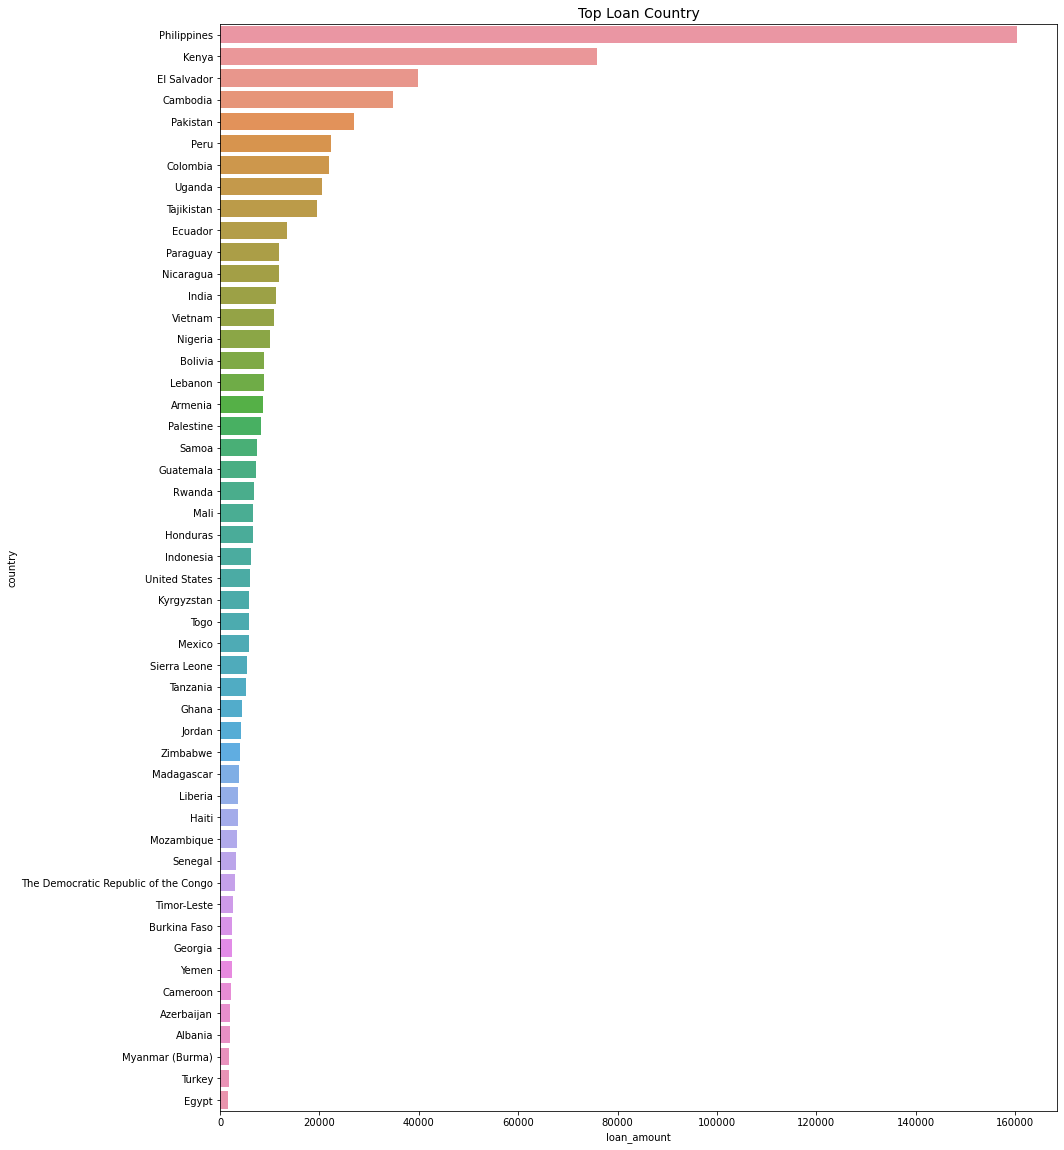

In [43]:
# 1. 50 country with largest number of loans
total_by_loan = loans.groupby(['country'], as_index=False)['loan_amount'].count()\
                .sort_values('loan_amount', ascending=False)\
                .head(50)
plt.figure(figsize=(15,20))
sns.barplot(data=total_by_loan, x='loan_amount', y='country')
plt.title("Top Loan Country",fontsize=14)

**Conclussion**: Negara dengan pinjaman terbanyak adalah Filipina diikuti dengan Kenya di urutan no 2. Mayoritas negara-negara 10 besar urutan di atas masuk dalam negara berkembang.

Text(0.5, 1.0, 'Top Loan Sector')

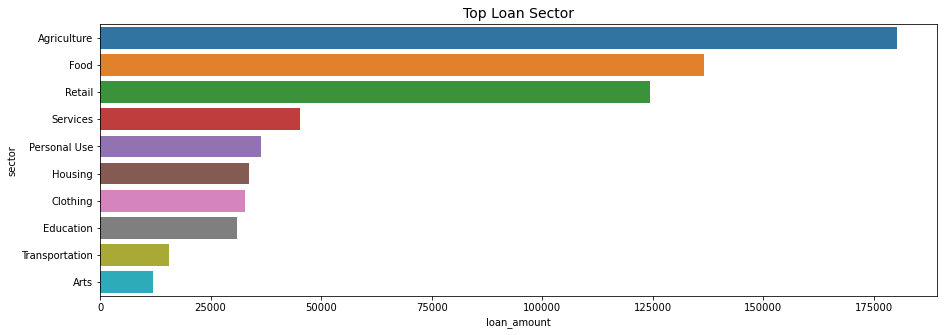

In [49]:
# 2. 10 sector popular loans sector
total_by_sector = loans.groupby(['sector'], as_index=False)['loan_amount'].count()\
                .sort_values('loan_amount', ascending=False)\
                .head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=total_by_sector, x='loan_amount', y='sector')
plt.title("Top Loan Sector",fontsize=14)

**Conclussion**: Sektor yang banyak melakukan pinjaman yaitu sektor agrikultur, sektor makanan, dan retail

Text(0.5, 1.0, 'Top Loan by Activity')

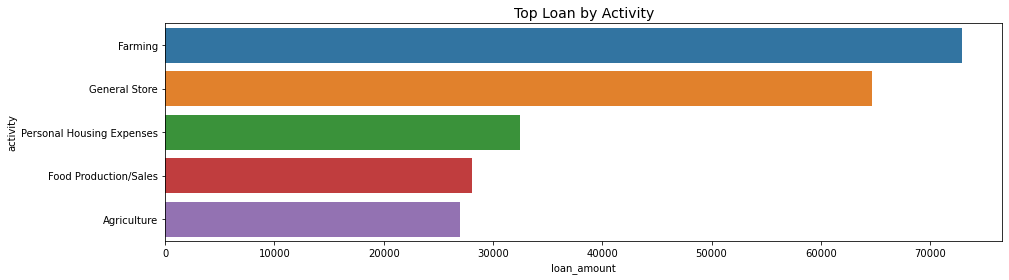

In [57]:
# 3. Number of loans by activity
total_by_activity = loans.groupby(['activity'], as_index=False)['loan_amount'].count()\
                         .sort_values('loan_amount', ascending=False)\
                         .head(5)
plt.figure(figsize=(15,4))
sns.barplot(data=total_by_activity, x='loan_amount', y='activity')
plt.title("Top Loan by Activity",fontsize=14)

**Conclussion**: Dana pinjaman paling banyak digunakan dalam bidang pertanian, perdagangan dan pengeluaran rumah tangga.

Text(0.5, 1.0, 'Top Loan by Region')

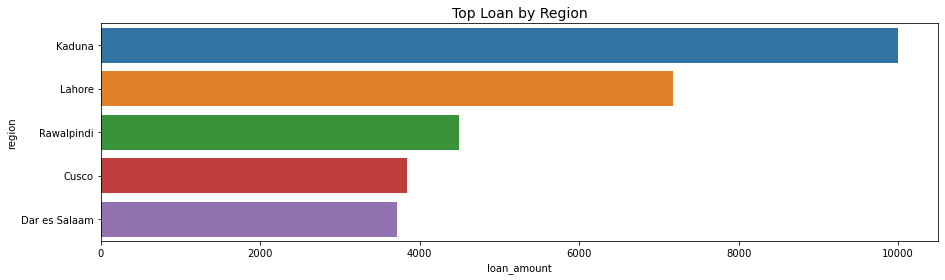

In [82]:
# 4. Regions with most number of loans
total_by_region = loans.groupby(['region'], as_index=False)['loan_amount'].count()\
                         .sort_values('loan_amount', ascending=False)\
                         .head(5)
plt.figure(figsize=(15,4))
sns.barplot(data=total_by_region, x='loan_amount', y='region')
plt.title("Top Loan by Region",fontsize=14)

**Conclussion**: Daerah yang melakukan pinjaman adalah Kaduna, Lahore dan Rawalpindi

Text(0.5, 1.0, 'Most Use Currency')

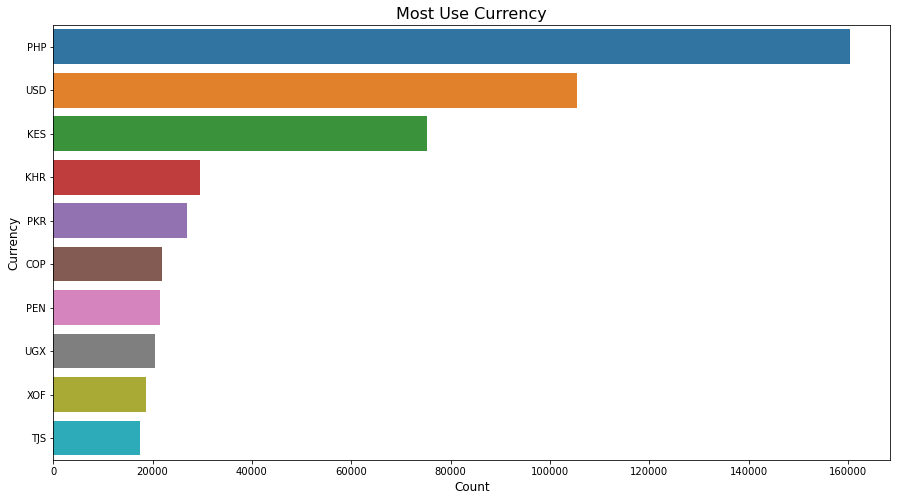

In [83]:
# 5. Most used currency
plt.figure(figsize=(15,8))
count = loans['currency'].value_counts()\
                         .head(10)
sns.barplot(count.values, count.index, )
plt.xlabel('Count', fontsize=12)
plt.ylabel('Currency', fontsize=12)
plt.title("Most Use Currency", fontsize=16)

**Conclussion**: Mata uang yang banyak digunakan untuk pinjaman adalah Peso Filipina kemudian Dollar Amerika

In [78]:
# 6. Make a Linear Regression Model Loan Amount & Funded Amount VS Terms in Month
# Define x / feature / parameter dan y / label / target
x = loans2[['funded_amount', 'loan_amount']]
y = loans2['term_in_months']

# Split the training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initiate the model
model = LinearRegression()

# Training process
model.fit(x_train, y_train)

# Testing process and evaluation
y_pred = model.predict(x_test)
error = metrics.mean_absolute_error(y_test, y_pred)
print('MAE: {}'.format(error))

MAE: 5.3919267941322415


<AxesSubplot:xlabel='funded_amount', ylabel='term_in_months'>

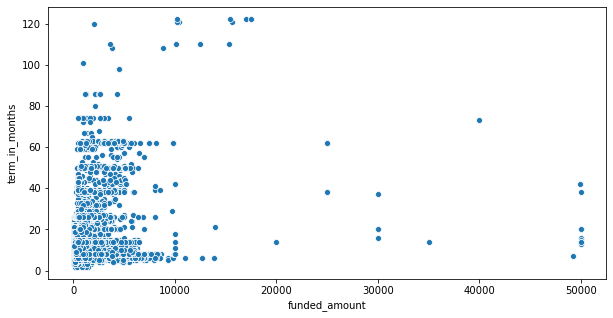

In [81]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans2, x='funded_amount', y='term_in_months')

**Conclussion**: Tidak ada keterkaitan antara loan_amount (jumlah pinjaman) dengan term in month (total angsuran)

In [84]:
# 7. Make a Linear Regression Model Loan Amount VS Funded Amount 
# Define x / feature / parameter dan y / label / target
x = loans2[['funded_amount']]
y = loans2['loan_amount']

# Split the training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initiate the model
model = LinearRegression()

# Training process
model.fit(x_train, y_train)

# Testing process and evaluation
y_pred = model.predict(x_test)
error = metrics.mean_absolute_error(y_test, y_pred)
print('MAE: {}'.format(error))

MAE: 4.482479245879906e-12


<AxesSubplot:xlabel='funded_amount', ylabel='loan_amount'>

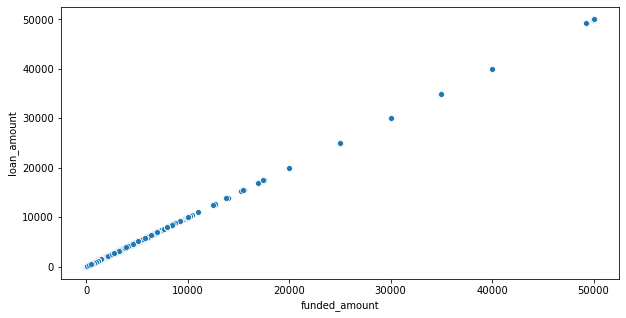

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=loans2, x='funded_amount', y='loan_amount')

**Conclussion**: Ada keterkaitan antara data funded_amount dengan data loan_amount

Text(0.5, 1.0, 'Most Uses of Loans')

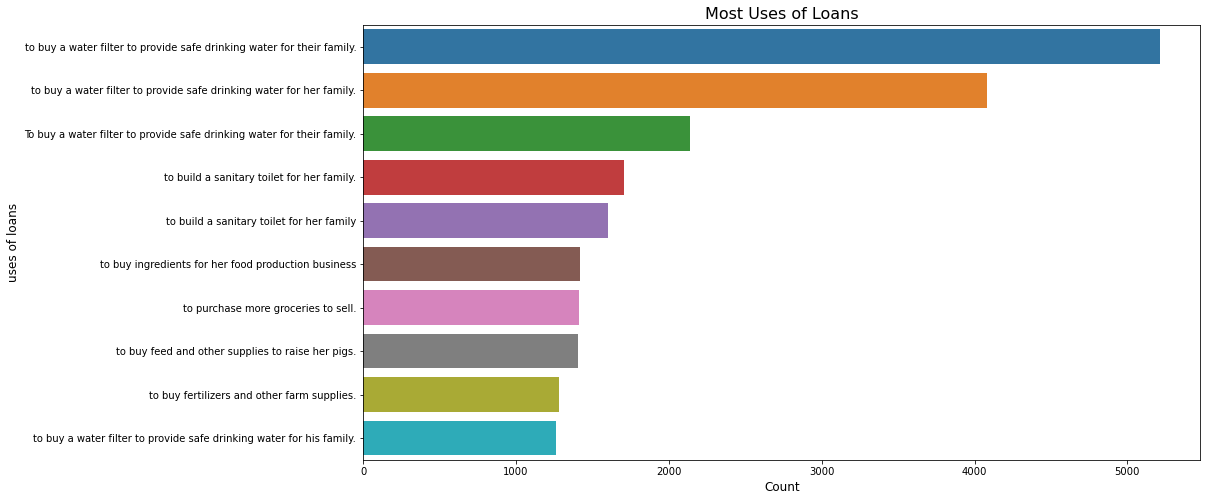

In [87]:
# 8. Most uses of Loans
plt.figure(figsize=(15,8))
count = loans['use'].value_counts().head(10)
sns.barplot(count.values, count.index, )
plt.xlabel('Count', fontsize=12)
plt.ylabel('uses of loans', fontsize=12)
plt.title("Most Uses of Loans", fontsize=16)

**Conclusion**: Paling banyak pinjaman dana adalah untuk membeli air kebutuhan air minum yang aman bagi keluarga, kemudian yang kedua untuk membangun toilet bagi keluarga dan kegunaan terbanyak ketiga adalah untuk membeli bahan baku produksi makanan.

Text(0.5, 1.0, 'Popular loan sector in terms of loan amount')

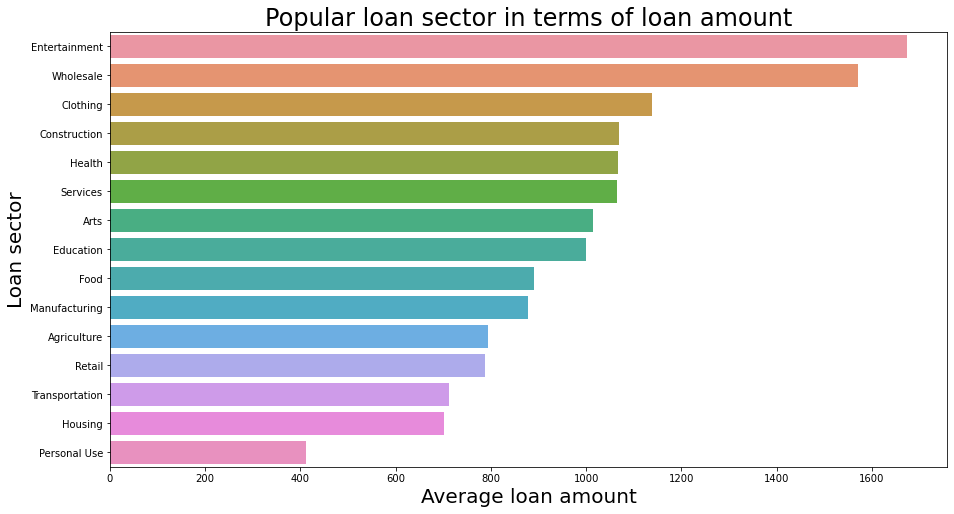

In [91]:
# 9. Popular Sector in terms of Loan Amount
plt.figure(figsize=(15,8))
count = round(loans.groupby(['sector'])['loan_amount'].mean()\
                   .sort_values(ascending=False))
sns.barplot(count.values, count.index, )
plt.xlabel('Average loan amount', fontsize=20)
plt.ylabel('Loan sector', fontsize=20)
plt.title('Popular loan sector in terms of loan amount', fontsize=24)

**Conclussion**: Sektor yang populer dalam penggunaan pinjaman adalah sektor hiburan

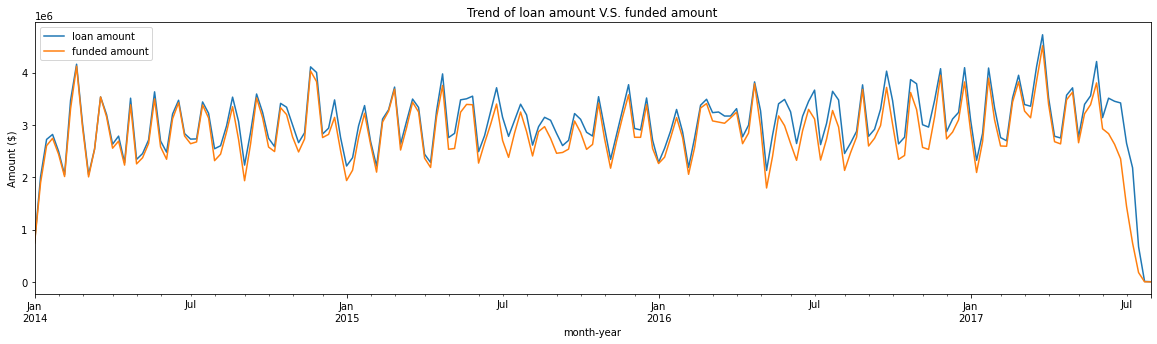

In [101]:
# 10. Trend Loan Amount VS Funded Amount
loans.index = pd.to_datetime(loans['posted_time'])
plt.figure(figsize = (20, 5))
ax = loans['loan_amount'].resample('w').sum().plot()
ax = loans['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Amount ($)')
ax.set_xlabel('month-year')
ax.set_xlim((pd.to_datetime(loans['posted_time'].min()), 
             pd.to_datetime(loans['posted_time'].max())))
ax.legend(["loan amount", "funded amount"])
plt.title('Trend of loan amount V.S. funded amount')

plt.show()

**CONCLUSSION**: Trend funded amount dan Loan Amount hampir sama setiap bulannya